# DOR

In [1]:
import os
import subprocess

whoami = subprocess.run("whoami", stdout=subprocess.PIPE)
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/10x10kc250kr.h5ad")):
    !sh /home/jovyan/data/10x10kc250kr.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/10x80kc25kr.h5ad")):
    !sh /home/jovyan/data/10x80kc25kr.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/c1htmedium.h5ad")):
    !sh /home/jovyan/data/c1htmedium.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/c1htsmall.h5ad")):
    !sh /home/jovyan/data/c1htsmall.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/celseq2.h5ad")):
    !sh /home/jovyan/data/celseq2.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/dropseq.h5ad")):
    !sh /home/jovyan/data/dropseq.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/icell8.h5ad")):
    !sh /home/jovyan/data/icell8.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/marsseq.h5ad")):
    !sh /home/jovyan/data/marsseq.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/quartzseq2.h5ad")):
    !sh /home/jovyan/data/quartzseq2.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/gmcscrbseq.h5ad")):
    !sh /home/jovyan/data/gmcscrbseq.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/smartseq2.h5ad")):
    !sh /home/jovyan/data/smartseq2.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/singlenuclei.h5ad")):
    !sh /home/jovyan/data/singlenuclei.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/ddseq.h5ad")):
    !sh /home/jovyan/data/ddseq.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/indrop.h5ad")):
    !sh /home/jovyan/data/indrop.sh
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/10xv3.h5ad")):
    !sh /home/jovyan/data/10xv3.sh

In [2]:
from typing import NamedTuple

from grnet.anndata.preprocessing import binarize, rpm, logtransform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

from tools.preferences import kwarg_savefig

In [3]:
class Config(NamedTuple):
    export: str = "/home/jovyan/output/logistic_model"
    
conf = Config()
os.makedirs(conf.export, exist_ok=True)

In [4]:
dsname = {
    "10x10kc250kr": "Chromium V2\n(deep)",
    "10x80kc25kr": "Chromium V2\n(shallow)",
    "singlenuclei": "Chromium V2\n(sn)",
    "10xv3": "Chromium V3",
    "c1htmedium": "C1HT-medium",
    "c1htsmall": "C1HT-small",
    "celseq2": "CEL-seq2",
    "dropseq": "Drop-seq",
    "icell8": "ICELL8",
    "marsseq": "MARS-Seq",
    "quartzseq2": "Quartz-Seq2",
    "gmcscrbseq": "gmcSCRB-seq",
    "ddseq": "ddSEQ",
    "indrop": "inDrop",
    "smartseq2": "Smart-Seq2",
}

In [5]:
bin_datasets = [
    binarize(
        sc.read_h5ad(
            f"/home/jovyan/data/{ds}.h5ad",
            as_sparse=["X"]
        ),
        normalizer=lambda X: logtransform(rpm(X), base=2)
    ) for ds in dsname
]

In [6]:
cov = pd.concat([
    ds.var.assign(
        name=[n for v in range(ds.shape[1])]
    ) for ds, n in zip(bin_datasets, dsname.values())
])

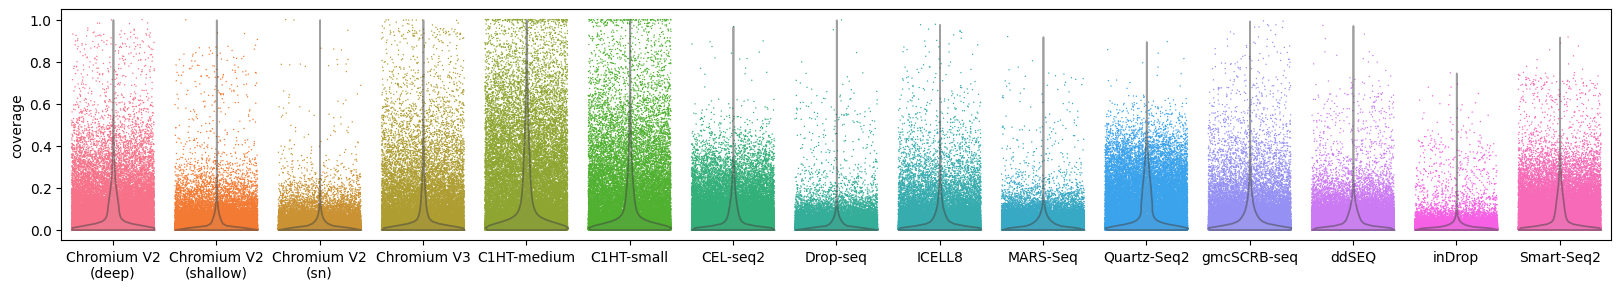

In [7]:
fig, ax = plt.subplots(figsize=(20, 3))

sns.violinplot(
    data=cov,
    y="coverage", hue="name",
    x="name",
    inner=None, cut=0,
    alpha=.5
)
sns.stripplot(
    data=cov,
    y="coverage", hue="name",
    x="name",
    s=1,
    jitter=.4,
    zorder=0
)

ax.set(xlabel="");

fig.savefig(f"{conf.export}/coverage.png", **kwarg_savefig)

In [8]:
meta = pd.concat([
    ds.obs.assign(
        name=[n for v in range(ds.shape[0])]
    ) for ds, n in zip(bin_datasets, dsname.values())
])

/tmp/ipykernel_79253/3077270607.py:22: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  ) if np.isnan(meta.groupby("name").min().loc[n, "nUMIs"]) else None
/tmp/ipykernel_79253/3077270607.py:22: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  ) if np.isnan(meta.groupby("name").min().loc[n, "nUMIs"]) else None
/tmp/ipykernel_79253/3077270607.py:22: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  ) if np.isnan(meta.groupby("name").min().loc[n, "nUMIs"]) else None
/tmp/ipykernel_79253/3077270607.py:22: FutureW

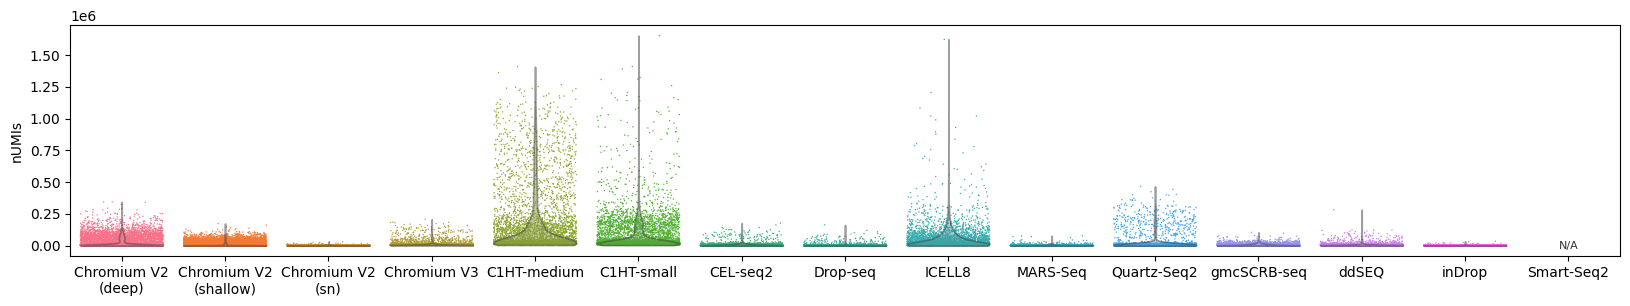

In [9]:
fig, ax = plt.subplots(figsize=(20, 3))

sns.violinplot(
    data=meta,
    y="nUMIs", hue="name",
    x="name",
    inner=None, cut=0,
    alpha=.5
)
sns.stripplot(
    data=meta,
    y="nUMIs", hue="name",
    x="name",
    s=1,
    jitter=.4,
    zorder=0
)

for i, n in enumerate(dsname.values()):
    ax.text(
        i, 0, "N/A", ha="center", va="center", size=8, c=".2"
    ) if np.isnan(meta.groupby("name").min().loc[n, "nUMIs"]) else None

ax.set(xlabel="");

fig.savefig(f"{conf.export}/umi.png", **kwarg_savefig)

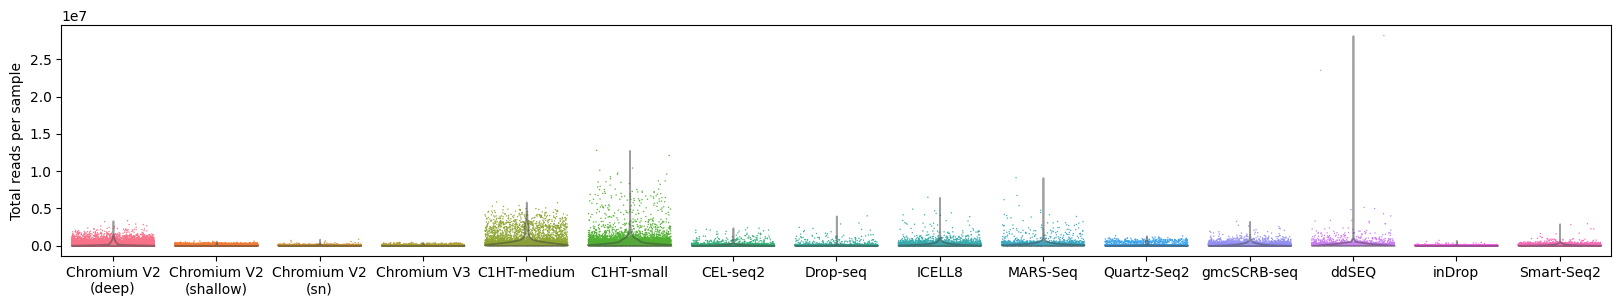

In [10]:
fig, ax = plt.subplots(figsize=(20, 3))

sns.violinplot(
    data=meta,
    y="nTReads", hue="name",
    x="name",
    inner=None, cut=0,
    alpha=.5
)
sns.stripplot(
    data=meta,
    y="nTReads", hue="name",
    x="name",
    s=1,
    jitter=.4,
    zorder=0
)

ax.set(xlabel="", ylabel="Total reads per sample");

fig.savefig(f"{conf.export}/total_reads.png", **kwarg_savefig)

In [11]:
datasize = pd.DataFrame({
    "name": [n.replace("\n", " ") for n in dsname.values()],
    "n_samples": [ds.shape[0] for ds in bin_datasets],
    "nTReads": [ds.obs.nTReads.sum() for ds in bin_datasets]
})

In [12]:
from adjustText import adjust_text

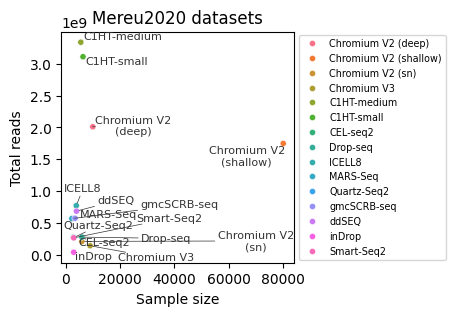

In [13]:
fig, ax = plt.subplots(figsize=(3, 3))

sns.scatterplot(
    data=datasize,
    x="n_samples", y="nTReads",
    hue="name", s=20
)

ax.legend(loc="center left", bbox_to_anchor=(1, .5), fontsize="x-small")
txt = []
for i, name in enumerate(dsname.values()):
    txt += [ax.text(
        *datasize.loc[i, ["n_samples", "nTReads"]], 
        name,
        size=8, ha="center", va="center",
        c=".2"
    )]

adjust_text(txt, arrowprops=dict(arrowstyle='-', color='.2', lw=0.5))

ax.set(title="Mereu2020 datasets", xlabel="Sample size", ylabel="Total reads")

fig.savefig(f"{conf.export}/scatter.png", **kwarg_savefig)

In [14]:
import json
from typing import Callable, Union

import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

from sklearn.metrics import r2_score, mean_squared_error


class LogisticModel:
    def __init__(
        self,
        random_state: int = 0,
        n_trials: int = 100,
        search_min: float = 0.,
        search_max: float = 1.
    ) -> None:
        self.seed = random_state
        self.n_trials = n_trials
        self.search_min = search_min
        self.search_max = search_max
        return None
        
    def fit(
        self,
        data: ad.AnnData,
        optimizer: str = "Adagrad",
        lr: float = .1
    ) -> None:
        data = binarize(data) if "binarized" not in data.uns else data
        torch.manual_seed(self.seed)
        b = torch.rand(1, requires_grad=True)
        x = torch.from_numpy(data.var["Mean"].values)
        y = torch.from_numpy(data.var["DOR"].values)

        torch.manual_seed(self.seed)
        optimizer = eval(f"torch.optim.{optimizer}")([b], lr=lr)

        for _ in range(self.n_trials):
            fx = 2 - 2 / (1 + np.e ** (-b * x))
            obj = (
                (fx - y) ** 2
            ).sum()
            obj.backward()
            optimizer.step()
            optimizer.zero_grad()

        self.beta = b.item()
        self.mse = obj.item()
        self.x = x
        self.y = y
        self.f = lambda mean: 2 - 2 / (1 + np.e ** (-self.beta * mean))
        self.y_hat = self.f(self.x)
        self.mse = mean_squared_error(self.y, self.y_hat)
        self.r2_score = r2_score(self.y, 2 - 2 / (1 + np.e ** (-self.beta * self.x)))
        self.predict_mean = lambda dor: (np.log(2 - dor) - np.log(dor)) / self.beta
        
    
    def plot(
        self, 
        ax: plt.Axes = None,
        label: str = None,
        **kwargs
    ) -> None:
        if ax is None:
            _, ax = plt.subplots()
        s = kwargs["s"] if "s" in kwargs else .1
        c = kwargs["c"] if "c" in kwargs else ".6"
        lc = kwargs["linecolor"] if "linecolor" in kwargs else "C0"
        digit = kwargs["round"] if "round" in kwargs else 3
        ndot = kwargs["ndot"] if "ndot" in kwargs else 1000
        ax.scatter(
            1 / (1 + np.e ** (-self.beta * self.x)), 
            self.y, s=s, c=c, label=label
        )
        x = np.linspace(0.5, 1, ndot)
        ax.plot(x, 2 - 2 * x, c=lc, label="$y=-2x+2$")
        ax.set(
            xlabel="$1/(1+e^{-b\cdot Mean})$", ylabel="$DOR$", 
            title="$b="+f"{round(self.beta, digit)},"+"\;R^2="+f"{self.r2_score.round(digit)}$"
        )
        ax.legend()
    
    
    def residual_plot(
        self, 
        ax: plt.Axes = None,
        label: str = None,
        **kwargs
    ) -> None:
        if ax is None:
            _, ax = plt.subplots()
        s = kwargs["s"] if "s" in kwargs else .1
        c = kwargs["c"] if "c" in kwargs else ".6"
        lc = kwargs["linecolor"] if "linecolor" in kwargs else "C0"
        ndot = kwargs["ndot"] if "ndot" in kwargs else 1000
        ax.scatter(self.x, self.y - self.y_hat, s=s, c=c, label=label)
        x = np.linspace(self.x.min(), self.x.max(), ndot)
        ax.plot(x, np.zeros(x.size), c=lc, label="$y=0$")
        ax.set(xlabel="$Mean$", ylabel="Residual errors", title="Residual plot")
        ax.legend()


    def calibration_plot(
        self,
        ax: plt.Axes = None,
        hide_curve: bool = False,
        label: str = None,
        **kwargs
    ) -> None:
        if ax is None:
            _, ax = plt.subplots()
        s = kwargs["s"] if "s" in kwargs else .1
        c = kwargs["c"] if "c" in kwargs else ".6"
        lc = kwargs["linecolor"] if "linecolor" in kwargs else "C0"
        ndot = kwargs["ndot"] if "ndot" in kwargs else 1000
        ln = kwargs["linelabel"] if "linelabel" in kwargs else "$y=-2/(1+e^{-b\cdot Mean})+2$"
        ax.scatter(self.x, self.y, s=s, c=c, label=label)
        if not hide_curve:
            x = np.linspace(self.x.min(), self.x.max(), ndot)
            ax.plot(x, self.f(x), c=lc, label=ln)

        ax.set(xlabel="$Mean$", ylabel="$DOR$")
        if not hide_curve:
            ax.legend()

In [15]:
import optuna
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
from sklearn.metrics import mean_squared_error as mse

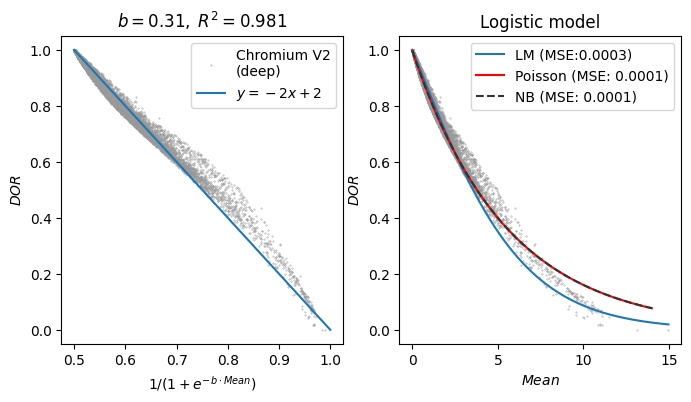

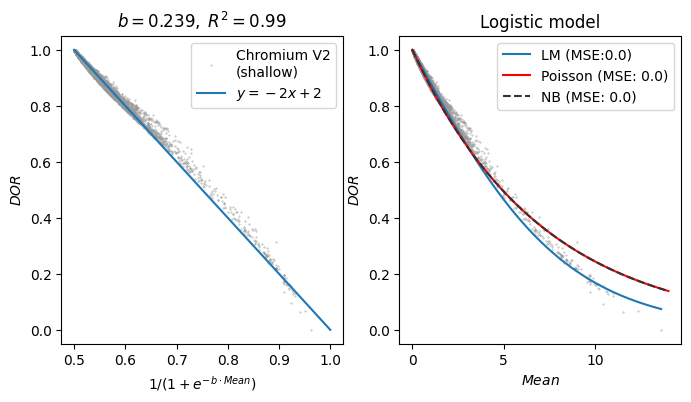

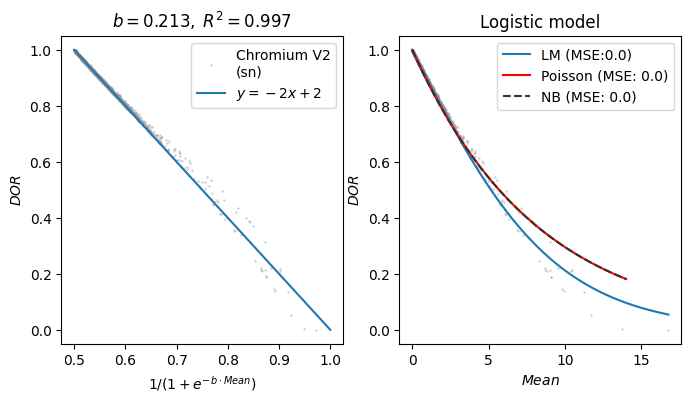

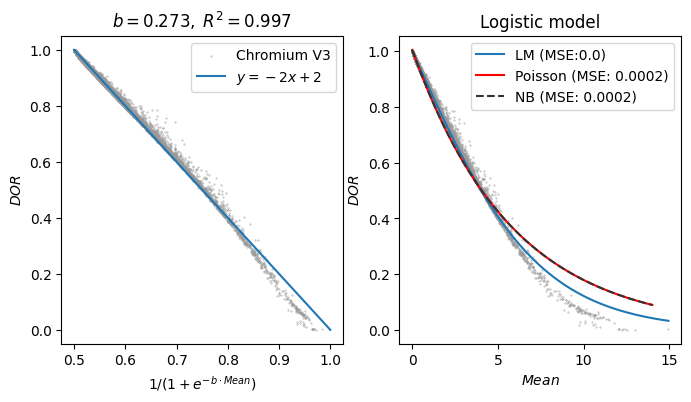

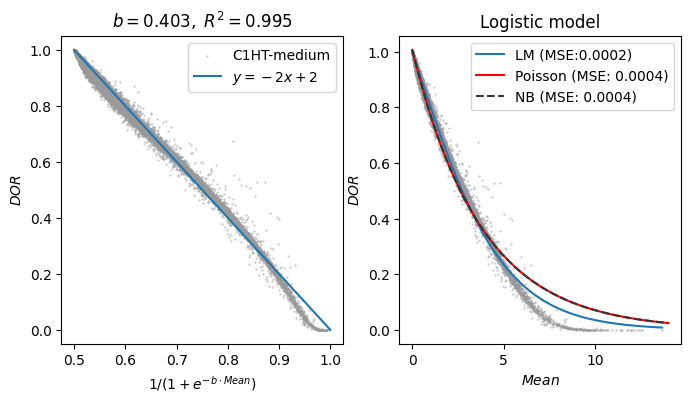

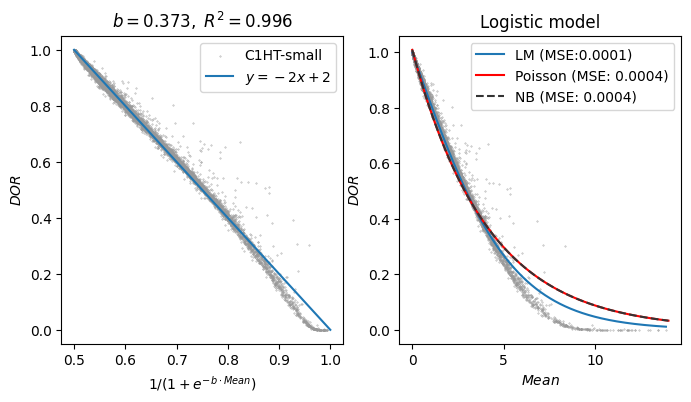

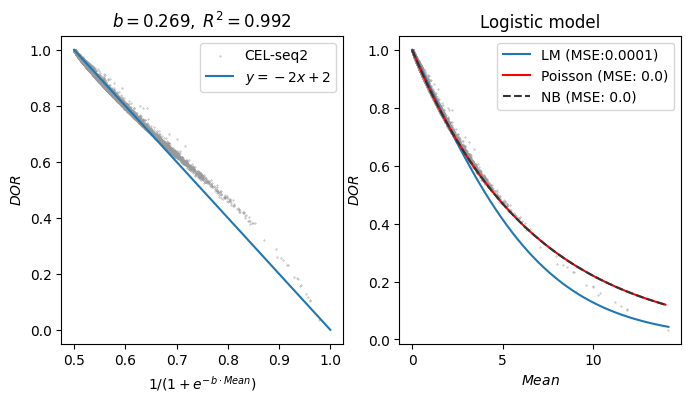

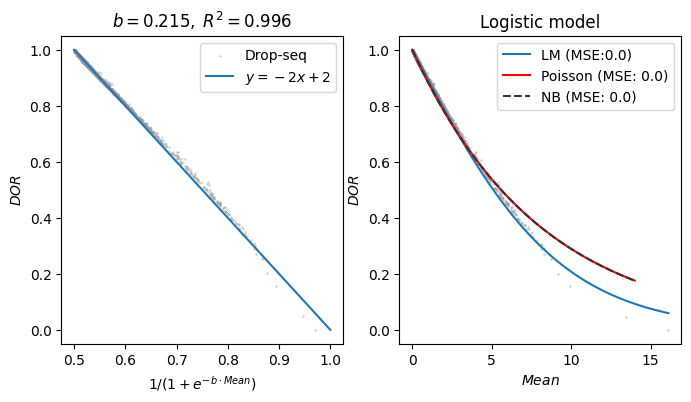

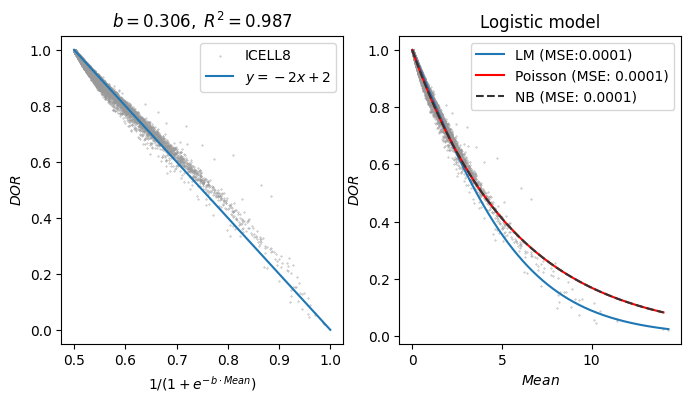

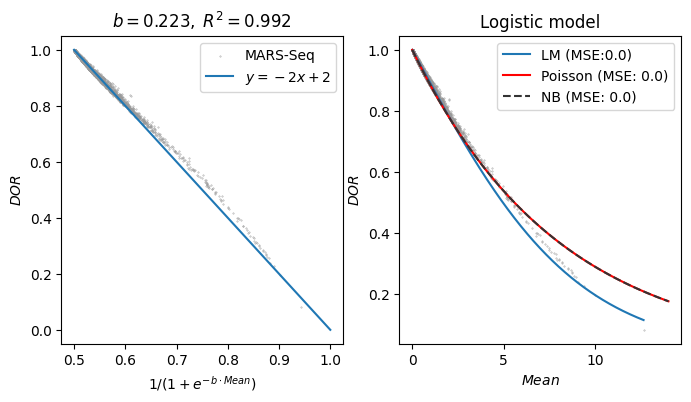

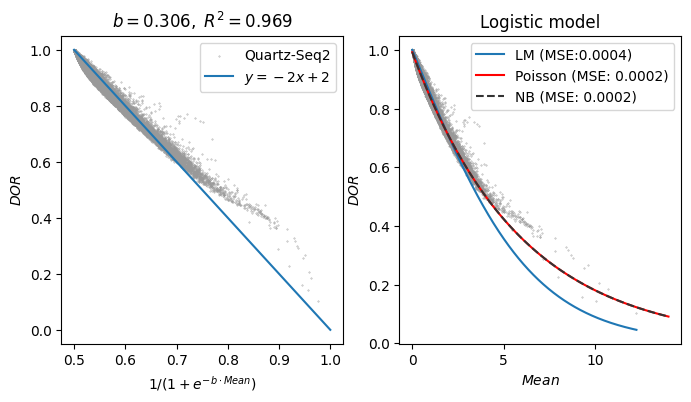

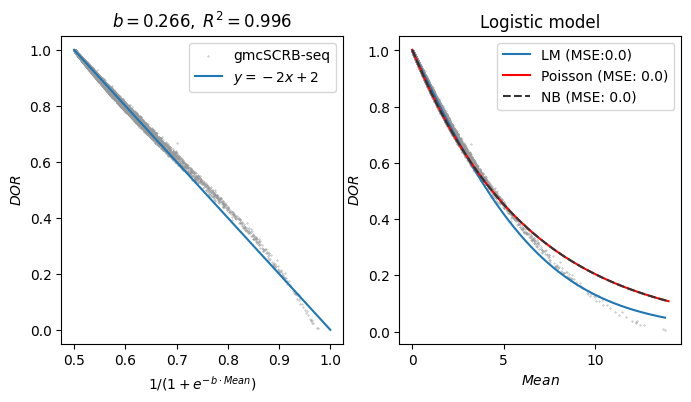

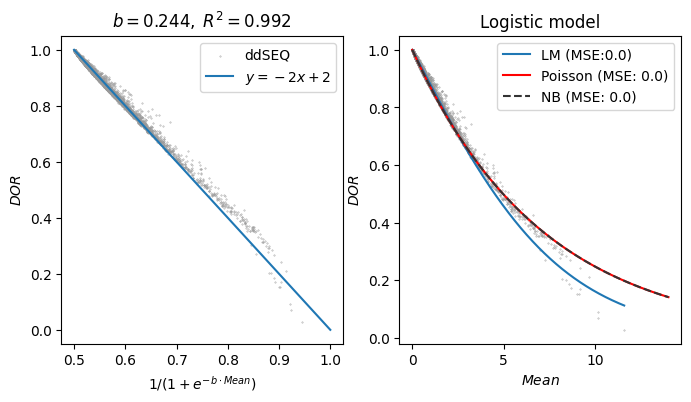

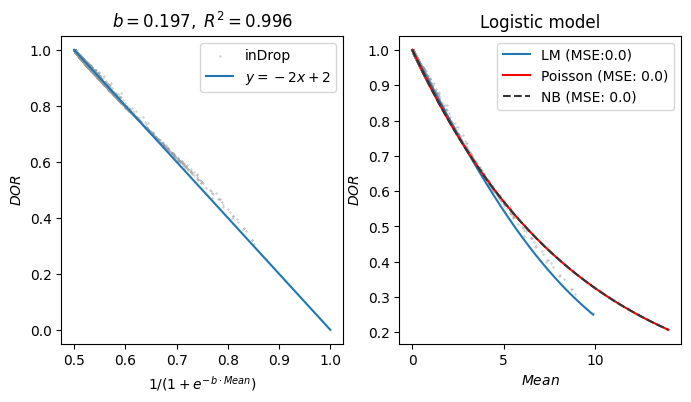

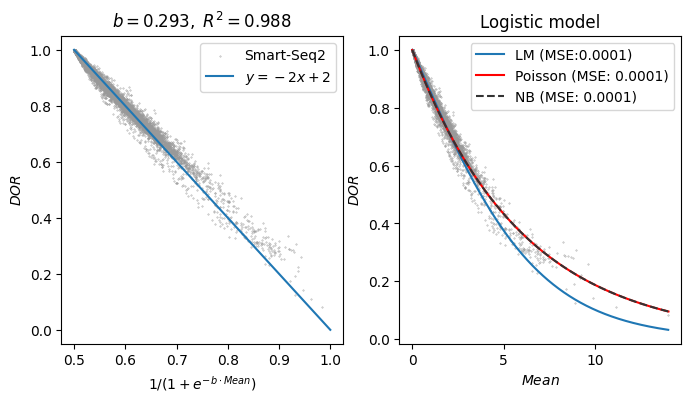

In [17]:
optuna.logging.set_verbosity(optuna.logging.CRITICAL)

for ds, n in zip(bin_datasets, dsname.values()):
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    lm = LogisticModel()
    lm.fit(ds)
    lm.plot(ax=ax[0], label=n)
    lm.calibration_plot(ax=ax[-1], linelabel=f"LM (MSE:{lm.mse.round(4)})")
    ax[-1].set(title="Logistic model")
    
    endog = ds.var["DOR"].values
    exog = sm.add_constant(ds.var["Mean"].values)

    link = sm.genmod.families.links.Log()

    def objective(trial):
        alpha = trial.suggest_float('alpha', .01, 2)
        nb = sm.GLM(endog, exog, family=sm.families.NegativeBinomial(alpha=alpha, link=link))
        return nb.fit().aic

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=200)
    alpha = study.best_params['alpha']

    poi = sm.GLM(endog=endog, exog=exog, family=sm.families.Poisson(link=link))
    nb = sm.GLM(endog=endog, exog=exog, family=sm.families.NegativeBinomial(link=link, alpha=alpha))
    res_poi = poi.fit()
    res_nb = nb.fit()
    
    sns.lineplot(
        x=np.linspace(0, 14, 100),
        y=res_poi.predict(sm.add_constant(np.linspace(0, 14, 100))),
        label=f"Poisson (MSE: {mse(lm.y, res_poi.predict(sm.add_constant(lm.x))).round(4)})",
        c="r", ax=ax[1]
    )
    sns.lineplot(
        x=np.linspace(0, 14, 100),
        y=res_nb.predict(sm.add_constant(np.linspace(0, 14, 100))),
        label=f"NB (MSE: {mse(lm.y, res_nb.predict(sm.add_constant(lm.x))).round(4)})",
        linestyle="--", c=".2", ax=ax[1]
    )

# fig.savefig(f"{conf.export}/calibration_curve.png", **kwarg_savefig)